In [1]:
!pip install -q streamlit

## Create a streamlit app example


Memakai prediction code yang sudah dibuat di C

In [94]:
%%writefile prediction_code.py
import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load the machine learning model and encoders
model = joblib.load('XGBoost.pkl')
gender_encode = joblib.load('gender_encode.pkl')
label_encode = joblib.load('label_encode.pkl')

def main():
    st.title('Churn Model Deployment')
    st.header('Fill data down below!')

    # Add user input components for features
    credit_score = st.number_input('Credit Score', min_value=300, max_value=850, value=500)
    geography = st.selectbox('Geography', ['France', 'Germany', 'Spain'])
    gender = st.radio('Gender', ['Male', 'Female'])
    age = st.number_input('Age', min_value=18, max_value=100, value=30)
    tenure = st.number_input('Tenure', min_value=0, max_value=20, value=5)
    balance = st.number_input('Balance', min_value=0.0, value=0.0)
    num_of_products = st.number_input('Number of Products', min_value=1, max_value=4, value=1)
    has_cr_card = st.radio('Has Credit Card', ['Yes', 'No'])
    is_active_member = st.radio('Is Active Member', ['Yes', 'No'])
    estimated_salary = st.number_input('Estimated Salary', min_value=0.0, value=0.0)


    # Collect user input data
    input_data = {
        'CreditScore': int(credit_score),
        'Geography': geography,
        'Gender': gender,
        'Age': int(age),
        'Tenure': int(tenure),
        'Balance': float(balance),
        'NumOfProducts': int(num_of_products),
        'HasCrCard': 1 if has_cr_card == 'Yes' else 0,
        'IsActiveMember': 1 if is_active_member == 'Yes' else 0,
        'EstimatedSalary': float(estimated_salary)
        }

    df=pd.DataFrame([list(input_data.values())], columns=['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

    # Binary Encode for Gender column
    df=df.replace(gender_encode)

    # Label Encode for Geography column
    df['Geography'] = label_encode.fit_transform(df['Geography'])


    if st.button('Make Prediction'):
        features=df
        result = make_prediction(features)
        st.success(f'The prediction is: {result}')
        if result == 1:
          st.write("It indicates that the customer is expected to churn.")
        else:
          st.write("It indicates that the customer is not expected to churn")

def make_prediction(features):
    # Use the loaded model to make predictions
    # Replace this with the actual code for your model
    input_array = np.array(features).reshape(1, -1)
    prediction = model.predict(input_array)
    return prediction[0]

if __name__ == '__main__':
    main()


Writing prediction_code.py


## Install localtunnel

In [95]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package in 0.533s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



biar bisa akses dari gugel

## Run streamlit in background

In [96]:
!streamlit run /content/prediciton_code.py &>/content/logs.txt &

tidak dipublish, namun disimpann di logs.txt untuk URL nya

In [97]:
!curl ipv4.icanhazip.com

34.32.156.121


IP ini jadi password buat yang dibawah

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.86s
your url is: https://curly-berries-invent.loca.lt


# Hasil Test Set

1.  Test set pertama
- Credit Score = 750
- Geography = France
- Gender = Male
- Age = 30
- Tenure = 5
- Balance = 110000
- Num of products = 4
- Has Credit Card = Yes
- Is Active member = Yes
- Estimated Salary = 3000

Churn Prediction = 1
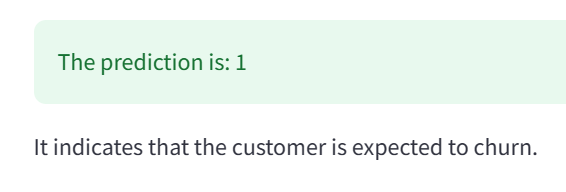

2. Test set kedua
- Credit Score = 500
- Geography = Germany
- Gender = Female
- Age = 30
- Tenure = 0
- Balance = 10000
- Num of products = 0
- Has Credit Card = No
- Is Active member = Yes
- Estimated Salary = 29999,99

Churn Prediction = 0
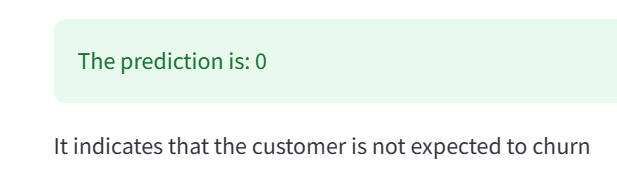
